<a href="https://colab.research.google.com/github/Jaweria-Asif/Automated-News-Categorization-Using-Data-Science-Techniques/blob/main/Data_Science_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Project Title**
#**"Automated News Categorization and Analysis Using Machine Learning"**

#**Problem Statement**
With the exponential growth of online news content, manually categorizing and analyzing news articles is time-consuming and inefficient. Dawn's website publishes a variety of news articles daily, making it challenging for users to access information organized by their interests or categories. This project aims to automate the process of categorizing news articles into predefined categories using machine learning models and web scraping techniques. The proposed solution will provide accurate and organized news data, enhancing user experience and enabling efficient data analysis for trends and insights.

#**Business Questions**

1. Which category has the most news articles?
2. Which category generated the highest number of articles on [specific date]?
3. What is the percentage distribution of each news category?
4. How many articles were published in the technology category on its busiest day?
5. What is the peak publication date for the health category, and how many articles were published?"
6. What percentage of news articles relate directly to business and financial markets?
7. Are there noticeable trends in news frequency over time?
8. What are the top-performing categories in terms of engagement (e.g., popularity or readership)?
9. Which category had the fewest articles published on?
10. What are the most common topics or themes across all categories?


***Importing Libraries***

In [ ]:
import csv
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
import re
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from string import punctuation
nltk.download('stopwords')
import joblib

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


***Defining News Categories***

In [ ]:
# Define keywords for classification
CATEGORY_KEYWORDS = {
    "political": ["election", "government", "politics", "minister", "policy", "parliament", "vote", "protest", "strikes", "march"],
    "sports": ["match", "tournament", "goal", "cricket", "football", "player", "team"],
    "country": ["Bangladesh", "Pakistan", "India", "China", "Phalestine", "Iran", "America", "England"],
    "business": ["stock", "market", "business", "company", "trade", "corporate", "investment", "liabilities"],
    "economic": ["economy", "inflation", "GDP", "growth", "finance", "budget"],
    "junk science": ["conspiracy", "fake science", "hoax", "pseudoscience", "myth", "debunked"],
    "technology": ["technology", "AI", "artificial intelligence", "software", "gadgets", "innovation", "cybersecurity"],
    "health": ["health", "medicine", "disease", "COVID", "vaccine", "hospital", "mental health"],
    "entertainment": ["movie", "film", "celebrity", "music", "concert", "award", "Netflix"],
    "environment": ["climate", "environment", "global warming", "pollution", "wildlife"],
    "science": ["research", "discovery", "space", "astronomy", "biology", "physics", "chemistry"],
    "education": ["education", "school", "university", "student", "teacher", "admissions", "exam"],
    "crime": ["crime", "murder", "robbery", "fraud", "scam", "arrest", "police"],
    "travel": ["travel", "tourism", "flight", "destination", "vacation", "hotel"],
    "lifestyle": ["lifestyle", "fashion", "food", "recipe", "fitness", "beauty", "trend"],
    "international": ["international", "global", "foreign", "UN", "world", "abroad"],
    "history": ["history", "ancient", "civilization", "war", "revolution", "archaeology", "historical figures"],
    "art & culture": ["art", "painting", "museum", "exhibition", "artist", "sculpture", "culture", "heritage"],
    "law": ["law", "court", "judge", "lawyer", "rights", "constitution", "legislation"],
    "social issues": ["equality", "human rights", "discrimination", "poverty", "justice", "freedom", "activism"],
    "technology & innovation": ["robotics", "automation", "IoT", "blockchain", "5G", "cloud computing", "virtual reality"],
    "food & drink": ["food", "recipe", "cuisine", "restaurant", "dish", "beverage", "nutrition"],
    "parenting & family": ["parenting", "children", "family", "home", "baby", "education", "family life"],
    "transportation": ["transport", "cars", "bikes", "public transport", "traffic", "infrastructure", "commute"],
    "finance": ["investment", "banking", "loans", "credit", "mortgage", "savings", "stock market"],
    "pets & animals": ["pets", "dogs", "cats", "wildlife", "animals", "veterinary", "zoo"],
    "philosophy": ["philosophy", "ethics", "metaphysics", "logic", "thought", "reason", "debate"],
    "weather": ["weather", "forecast", "temperature", "storm", "rain", "snow", "climate change"],
    "automotive": ["cars", "motorcycles", "electric vehicles", "autonomous vehicles", "engine", "car reviews"],
    "music": ["music", "song", "album", "artist", "band", "concert", "soundtrack"],
    "gaming": ["gaming", "video games", "gamer", "console", "e-sports", "streaming", "game review"],
    "literature": ["books", "reading", "author", "novel", "poetry", "literary awards", "book club"],
    "real estate": ["real estate", "property", "housing", "apartment", "mortgage", "landlord", "rental"],
    "religion": ["religion", "faith", "church", "temple", "holy", "spirituality", "belief"],
    "events": ["event", "festival", "conference", "exhibition", "celebration", "concert", "meeting"],
    "technology & gadgets": ["smartphones", "laptops", "gadgets", "wearables", "computers", "AI devices", "electronics"],
    "personal finance": ["budgeting", "savings", "loans", "debt", "retirement", "taxes", "credit scores"],
    "mental health": ["anxiety", "depression", "therapy", "stress", "mindfulness", "well-being", "counseling"],
    "social media": ["social media", "Instagram", "Twitter", "Facebook", "TikTok", "content creation", "influencer"],
    "nonprofit & charity": ["charity", "volunteering", "donation", "NGO", "philanthropy", "social good"],
    "startups & entrepreneurship": ["startup", "entrepreneur", "business plan", "venture capital", "innovation", "founder"],
    "music & performing arts": ["classical music", "jazz", "dance", "theater", "opera", "ballet", "musical"],
    "luxury & fashion": ["luxury", "designer", "high fashion", "couture", "jewelry", "accessories", "fashion trends"],
    "education & learning": ["online courses", "e-learning", "training", "skills development", "certifications", "study tips"],
    "cryptocurrency": ["bitcoin", "blockchain", "cryptocurrency", "ethereum", "NFT", "mining", "decentralized"],
    "podcasts": ["podcast", "audio", "interviews", "talk shows", "discussion", "podcast episodes", "show"],
    "space & astronomy": ["space exploration", "NASA", "planets", "black holes", "telescopes", "astronomical discoveries"],
    "luxury lifestyle": ["luxury homes", "private jets", "yachts", "luxury cars", "high-end lifestyle", "exclusive events"],
    "DIY & crafts": ["DIY", "crafts", "handmade", "home decor", "sewing", "knitting", "upcycling"],
    "virtual & augmented reality": ["VR", "AR", "augmented reality", "virtual reality games", "immersive technology"],
    "shopping & retail": ["shopping", "e-commerce", "sales", "retail", "discounts", "online shopping", "store reviews"],
    "food culture": ["gourmet", "ethnic cuisine", "street food", "food trends", "recipe sharing", "food culture"],
    "humanitarian aid": ["humanitarian", "disaster relief", "aid", "refugees", "crisis", "aid organizations"],
    "sustainability": ["sustainability", "eco-friendly", "green energy", "renewable", "sustainable practices", "green products"],
    "collectibles & antiques": ["collectibles", "antiques", "vintage", "rare items", "collector's items", "auction", "heritage"]
}

# Example of how to access the keywords for a specific category
print(CATEGORY_KEYWORDS["sports"])


['match', 'tournament', 'goal', 'cricket', 'football', 'player', 'team']


**Step # 01:**
**Data Collection/Data Scrapping**

(Collecting News Data From Dawn News Paper)

In [ ]:
# Function to classify categories based on keywords
def classify_category(title, summary):
    content = f"{title} {summary}".lower()
    for category, keywords in CATEGORY_KEYWORDS.items():
        if any(keyword in content for keyword in keywords):
            return category
    return "other"

In [ ]:
# Function to scrape news from Dawn News
def scrape_dawn_news():
    url = "https://www.dawn.com/latest-news"  # Dawn's latest news page
    response = requests.get(url)
    if response.status_code != 200:
        print("Failed to retrieve the page. Status code:", response.status_code)
        return []

    soup = BeautifulSoup(response.content, 'html.parser')

    # Finding all news articles
    articles = soup.find_all('article', class_='story')
    news_list = []

    for article in articles:
        try:
            title = article.find('h2', class_='story__title').text.strip()
            link = article.find('a')['href']
            summary = article.find('div', class_='story__excerpt').text.strip() if article.find('div', class_='story__excerpt') else ""

            # Determine category
            category = classify_category(title, summary)

            news_list.append({
                'title': title,
                'link': link,
                'summary': summary,
                'category': category
            })
        except AttributeError:
            continue

    return news_list

In [ ]:
# Function to save news data to a CSV file
def save_to_csv(news_list, filename="dawn_news.csv"):
    headers = ['Title', 'Summary', 'Link', 'Category']

    with open(filename, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.DictWriter(file, fieldnames=headers)
        writer.writeheader()

        for news in news_list:
            writer.writerow({
                'Title': news['title'],
                'Summary': news['summary'],
                'Link': news['link'],
                'Category': news['category']
            })

    print(f"Data saved to {filename}")


In [ ]:
# Main Function
if __name__ == "__main__":
    print("Scraping news from Dawn...")
    news_list = scrape_dawn_news()

    if not news_list:
        print("No news articles found!")
    else:
        print(f"Found {len(news_list)} articles. Classifying them...")

        # Save to CSV
        save_to_csv(news_list)

        # Display the data
        for idx, news in enumerate(news_list, start=1):
            print(f"\nNews #{idx}")
            print(f"Title: {news['title']}")
            print(f"Summary: {news['summary']}")
            print(f"Link: {news['link']}")
            print(f"Category: {news['category']}")

Scraping news from Dawn...
Found 227 articles. Classifying them...
Data saved to dawn_news.csv

News #1
Title: Bangladesh to investigate 2009 mutiny massacre
Summary: Families of victims accuse Hasina of orchestrating a plan to weaken the military to bolster her power in a country prone to coups.
Link: https://www.dawn.com/news/1881228/bangladesh-to-investigate-2009-mutiny-massacre
Category: other

News #2
Title: Three Bapsi Sidhwa novels you need to read
Summary: In honour of the late author, we've compiled a list of our favourite books by her.
Link: https://images.dawn.com/news/1193092/three-bapsi-sidhwa-novels-you-need-to-read
Category: literature

News #3
Title: US to continue surge of weapons deliveries to Ukraine: Biden
Summary: The purpose of Russia's 'outrageous' Christmas attack was to cut off Ukrainian people’s access to heat and electricity, says US president
Link: https://www.dawn.com/news/1881223/us-to-continue-surge-of-weapons-deliveries-to-ukraine-biden
Category: weather

***Loading Dawn News Data***

In [ ]:
data = pd.read_csv("dawn_news.csv")

***Data Analysis***

In [ ]:
print("Data Overview from Top:")
data.head(5)

Data Overview from Top:


,Title,Summary,Link,Category
0,Bangladesh to investigate 2009 mutiny massacre,Families of victims accuse Hasina of orchestra...,https://www.dawn.com/news/1881228/bangladesh-t...,other
1,Three Bapsi Sidhwa novels you need to read,"In honour of the late author, we've compiled a...",https://images.dawn.com/news/1193092/three-bap...,literature
2,US to continue surge of weapons deliveries to ...,The purpose of Russia's 'outrageous' Christmas...,https://www.dawn.com/news/1881223/us-to-contin...,weather
3,Bushra Bibi granted interim bail in Nov 26 pro...,District and sessions court judge grants inter...,https://www.dawn.com/news/1881197/bushra-bibi-...,political
4,Who is Richard Grenell — Trump’s pro-Imran Kha...,The envoy's repeated support for former PM Imr...,https://www.dawn.com/news/1881184/who-is-richa...,other


In [ ]:
print("Data Overview from Bottom:")
data.tail(5)

Data Overview from Bottom:


,Title,Summary,Link,Category
222,Controversial justice,Western countries have rightly pointed out tha...,https://www.dawn.com/news/1880905/controversia...,social issues
223,Days of rage,Anger around the world is growing as fundament...,https://www.dawn.com/news/1880907/days-of-rage,international
224,Pacem in terris?,Peace on Earth is imperilled or absent.,https://www.dawn.com/news/1880904/pacem-in-terris,art & culture
225,About Zakir’s drumming legacy,"Zakir Hussain’s fans, many of them in the West...",https://www.dawn.com/news/1880738/about-zakirs...,other
226,House of Sharifs,Do the Sharifs deserve more stints?,https://www.dawn.com/news/1880737/house-of-sha...,other


In [ ]:
print("Data Info:")
data.info()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     227 non-null    object
 1   Summary   206 non-null    object
 2   Link      227 non-null    object
 3   Category  227 non-null    object
dtypes: object(4)
memory usage: 7.2+ KB


In [ ]:
print("Data Describe: ")
data.describe()

Data Describe: 


,Title,Summary,Link,Category
count,227,206,227,227
unique,162,151,162,29
top,ICC confirms schedule for Champions Trophy 202...,Pakistani diplomat handed strong protest note;...,https://www.dawn.com/news/1880793/icc-confirms...,other
freq,3,3,3,67


***Step # 03: Exploratory Data Analysis / Visualization***

<ipython-input-111-8cfe353d15a6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")


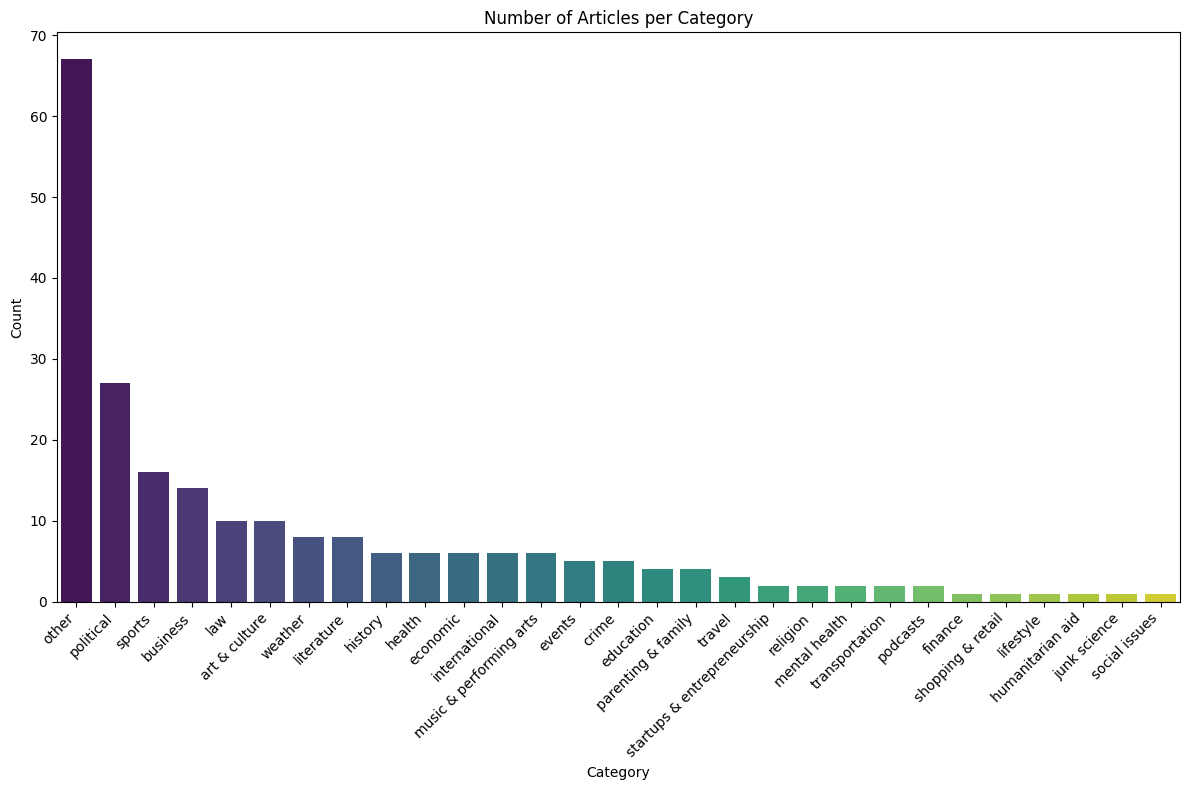

In [ ]:
# Visualize Category Distribution or Calculate the counts of each category
category_counts = data['Category'].value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")
plt.title("Number of Articles per Category")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Category")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


<ipython-input-112-fd00f3df354e>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data['Category'], kde=False, bins=len(data['Category'].unique()), palette="viridis")


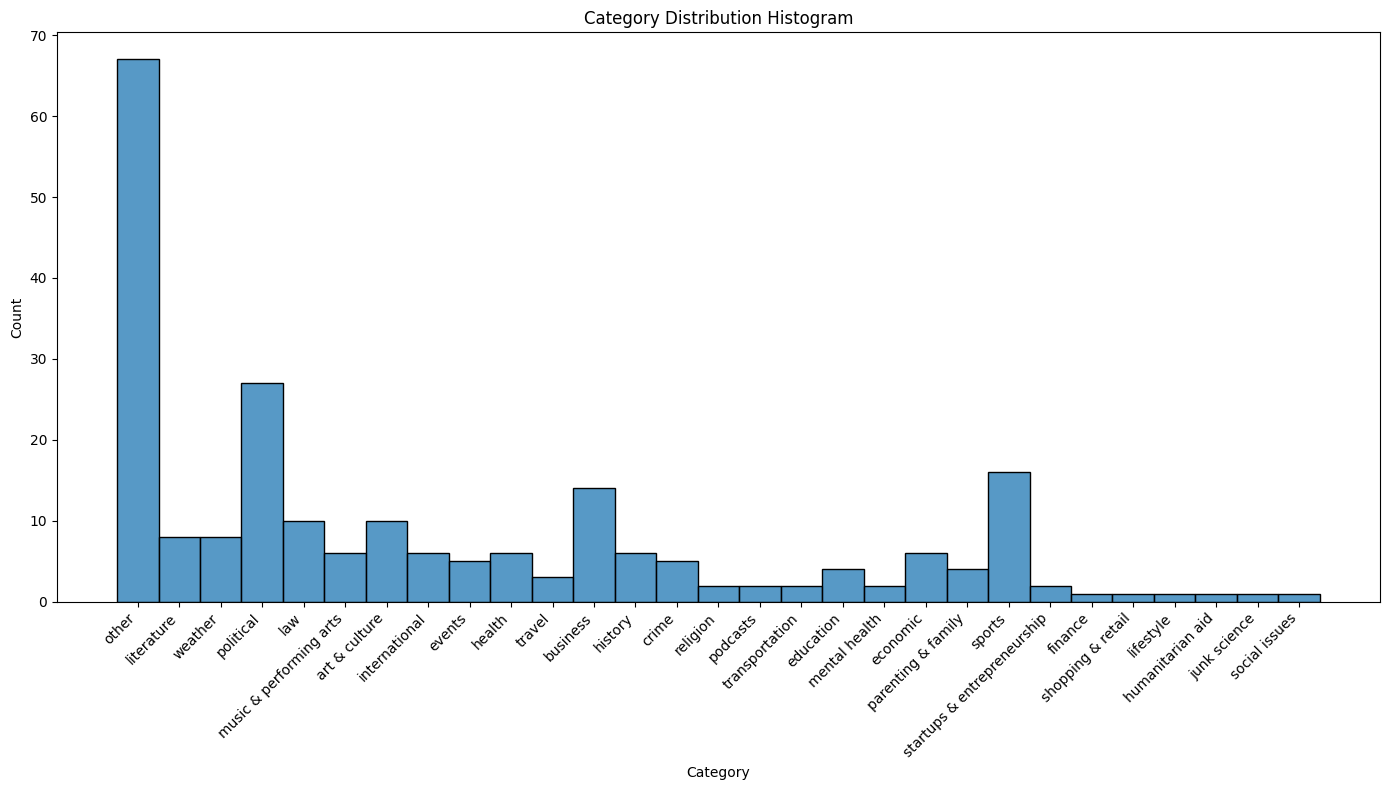

In [ ]:
# Visualize Category Distribution (Histogram)
plt.figure(figsize=(14, 8))
sns.histplot(data['Category'], kde=False, bins=len(data['Category'].unique()), palette="viridis")
plt.title("Category Distribution Histogram")
plt.xlabel("Category")
plt.ylabel("Count")

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

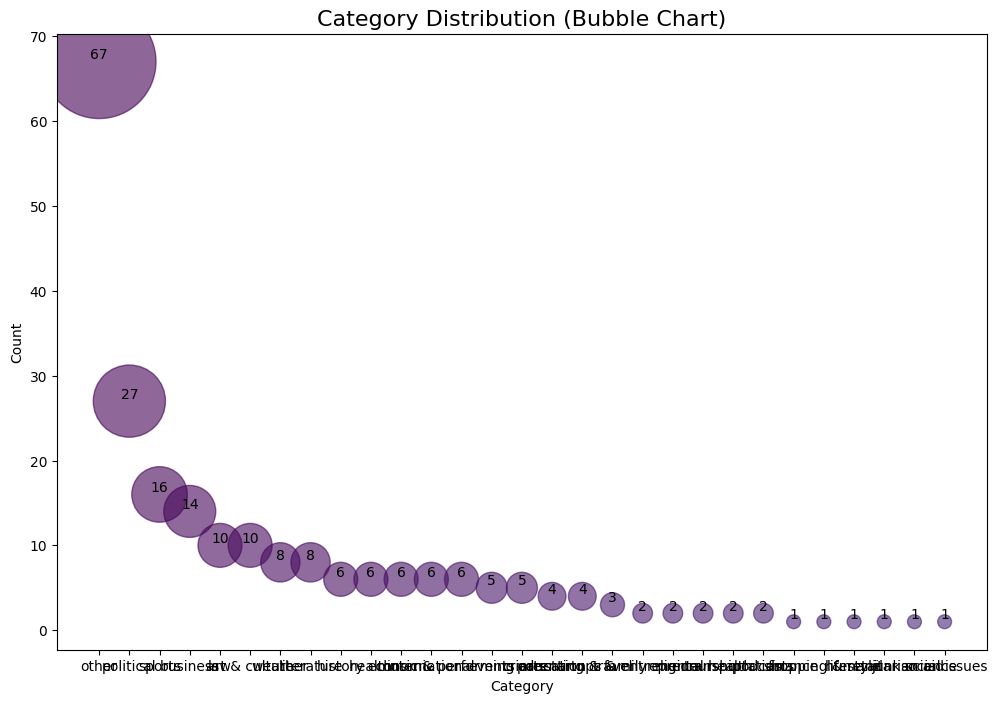

In [ ]:
category_counts = data['Category'].value_counts()
sizes = category_counts.values * 100
labels = category_counts.index

plt.figure(figsize=(12, 8))
plt.scatter(labels, category_counts.values, s=sizes, alpha=0.6, color=plt.cm.viridis.colors[:len(labels)])
for i, txt in enumerate(category_counts.values):
    plt.text(labels[i], category_counts.values[i], txt, ha='center', va='bottom', fontsize=10)

plt.title("Category Distribution (Bubble Chart)", fontsize=16)
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()


***Step # 02: Text Pre-Processing***

***Count Null Values***

In [ ]:
count=data.isnull().sum().sort_values(ascending=False)
percentage=((data.isnull().sum()/len(data)*100)).sort_values(ascending=False)
missing_data=pd.concat([count,percentage],axis=1,keys=['Count','Percentage'])
print("Count and Percentage of missing values for the columns: ")
missing_data

Count and Percentage of missing values for the columns: 


,Count,Percentage
Summary,21,9.251101
Title,0,0.000000
Link,0,0.000000
Category,0,0.000000


***Replace Null Values with "Missing"***

In [ ]:
# Fill missing values with "missing" for 'Title' and 'Summary' columns
data['Title'] = data['Title'].fillna("missing")
data['Summary'] = data['Summary'].fillna("missing")

# Verification
print(data.isnull().sum())

Title       0
Summary     0
Link        0
Category    0
dtype: int64


***Drop Unnecessary Columns***

In [ ]:
data.drop(columns=['Title','Link'],inplace=True)
data.head()

,Summary,Category
0,Families of victims accuse Hasina of orchestra...,other
1,"In honour of the late author, we've compiled a...",literature
2,The purpose of Russia's 'outrageous' Christmas...,weather
3,District and sessions court judge grants inter...,political
4,The envoy's repeated support for former PM Imr...,other


***Encoding Labels in Numeric Format***

In [ ]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the labels
data['Category'] = label_encoder.fit_transform(data['Category'])

# To see the mapping
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

{'art & culture': 0, 'business': 1, 'crime': 2, 'economic': 3, 'education': 4, 'events': 5, 'finance': 6, 'health': 7, 'history': 8, 'humanitarian aid': 9, 'international': 10, 'junk science': 11, 'law': 12, 'lifestyle': 13, 'literature': 14, 'mental health': 15, 'music & performing arts': 16, 'other': 17, 'parenting & family': 18, 'podcasts': 19, 'political': 20, 'religion': 21, 'shopping & retail': 22, 'social issues': 23, 'sports': 24, 'startups & entrepreneurship': 25, 'transportation': 26, 'travel': 27, 'weather': 28}


***Verifying Conversion***

In [ ]:
labels=data.Category
labels.head()

,Category
0,17
1,14
2,28
3,20
4,17


***Removing Stop Words and Doing Lemmatization (Text Pre-Processing)***

In [ ]:
def clean_input(text, remove_stop_words=True, lemmatize_words=False):
    stop_words = set(stopwords.words('english'))  # Load NLTK stopwords
    text = text.lower()
    text = re.sub(r"http\S+", "link", text)
    text = re.sub(r"[^A-Za-z0-9\s]", "", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\bI\b", "I am", text)
    text = re.sub(r"\bur\b", "your", text)
    text = re.sub(r"\band\b", " and ", text)
    text = re.sub(r"\bd\b", " would", text)
    text = re.sub(r"\b11\b", "will", text)
    text = re.sub(r"\bc\b", "can", text)
    text = re.sub(r"\breg\b", "eg", text)
    text = re.sub(r"\btkts\b", "tickets", text)
    text = re.sub(r"\bru\b", "you", text)
    text = "".join([c for c in text if c not in punctuation])
    words = text.split()
    if remove_stop_words:
        words = [w for w in words if w not in stop_words]
    cleaned_text = " ".join(words)
    return cleaned_text

***Cleaning each Row of Dataset using Lambda Clean input()***

In [ ]:
cleaned1=lambda x: clean_input(x)
data['New Data'] = pd.DataFrame(data.Summary.apply(cleaned1))
data.head(10)


,Summary,Category,New Data
0,Families of victims accuse Hasina of orchestra...,17,families victims accuse hasina orchestrating p...
1,"In honour of the late author, we've compiled a...",14,honour late author weve compiled list favourit...
2,The purpose of Russia's 'outrageous' Christmas...,28,purpose russias outrageous christmas attack cu...
3,District and sessions court judge grants inter...,20,district sessions court judge grants interim b...
4,The envoy's repeated support for former PM Imr...,17,envoys repeated support former pm imran khan r...
5,Imran's nephew Hassaan Niazi among two handed ...,12,imrans nephew hassaan niazi among two handed 1...
6,"Finance minister says ""modernising FBR’s exter...",20,finance minister says modernising fbrs externa...
7,Spokesperson says Islamabad “always prioritise...,16,spokesperson says islamabad always prioritised...
8,The misadventures of a 20-something on a searc...,0,misadventures 20something search prince charmi...
9,“It was a tricky decision to make but we’d lik...,17,tricky decision make wed like go new ball sout...


***Creating a Copy of Clean Text***

In [ ]:
new_train=data['New Data'].copy()
new_train.head()

,New Data
0,families victims accuse hasina orchestrating p...
1,honour late author weve compiled list favourit...
2,purpose russias outrageous christmas attack cu...
3,district sessions court judge grants interim b...
4,envoys repeated support former pm imran khan r...


***Step # 04(i) : Splitting Data into Training and Testing***

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(new_train,labels, test_size=0.3, random_state=10)

***Step # 04(ii) : Modelling***

***Using TF-IDF***

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

tfidf_train = tfidf_vectorizer.fit_transform(x_train)

tfidf_val = tfidf_vectorizer.transform(x_test)


***Using Logistic Regression***

In [ ]:
LogReg = LogisticRegression(max_iter=100)

LogReg.fit(tfidf_train, y_train)

Pred_LogReg = LogReg.predict(tfidf_val)

Accuracy_LogReg = metrics.accuracy_score(y_test, Pred_LogReg)

Accuracy_LogReg = round(Accuracy_LogReg * 100, 2)
print(f'Accuracy of Logistic Regression Model is: {Accuracy_LogReg}%')

Accuracy of Logistic Regression Model is: 36.23%


***Using Decission Tree***

In [ ]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(tfidf_train, y_train)
Pred_DT = dt_classifier.predict(tfidf_val)
Accuracy_DT = metrics.accuracy_score(y_test, Pred_DT)
Accuracy_DT = round(Accuracy_DT * 100, 2)
print(f'Accuracy of Decision Tree Model is: {Accuracy_DT}%')

Accuracy of Decision Tree Model is: 47.83%


***Using Random forest***

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(tfidf_train, y_train)
Pred_RF = rf_classifier.predict(tfidf_val)
Accuracy_RF = metrics.accuracy_score(y_test, Pred_RF)
Accuracy_RF = round(Accuracy_RF * 100, 2)
print(f'Accuracy of Random Forest Model is: {Accuracy_RF}%')

Accuracy of Random Forest Model is: 53.62%


***Using Voting Classifier combining DT, RF, LR Predictions using Majority Voting***

In [ ]:
# Define the three models for the voting classifier
voting_clf = VotingClassifier(estimators=[
    ('Logistic Regression', LogReg),
    ('Random Forest', rf_classifier),
    ('Decision Tree', dt_classifier)
], voting='soft')
# Fit the voting classifier on the training data
voting_clf.fit(tfidf_train, y_train)
# Predict using the trained voting classifier
Pred_Voting = voting_clf.predict(tfidf_val)
# Calculate the accuracy of the voting classifier
Accuracy_Voting = accuracy_score(y_test, Pred_Voting)
Accuracy_Voting = round(Accuracy_Voting * 100, 2)
# Print the accuracy of the voting classifier
print(f'Accuracy of Voting Classifier is: {Accuracy_Voting}%')

Accuracy of Voting Classifier is: 47.83%


***Results & Comparision***

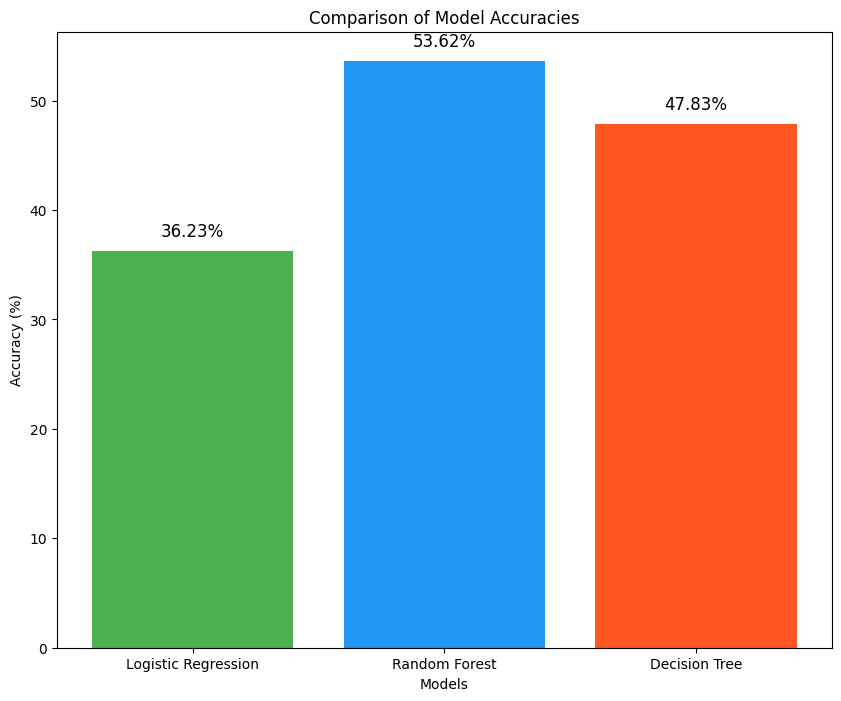

In [ ]:
# Models and accuracies for comparison (3 models)
models = ['Logistic Regression', 'Random Forest', 'Decision Tree']
accuracies = [Accuracy_LogReg, Accuracy_RF, Accuracy_DT]  # Replace with actual accuracy values

# Create bar plot
plt.figure(figsize=(10, 8))
bars = plt.bar(models, accuracies, color=['#4CAF50', '#2196F3', '#FF5722'])  # Custom colors for better contrast

# Labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Model Accuracies')

# Add accuracy labels on top of bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{height}%', ha='center', va='bottom', fontsize=12)

# Display plot
plt.show()


In [ ]:
# Save the models
joblib.dump(LogReg, 'logreg_model.pkl')
joblib.dump(rf_classifier, 'rf_model.pkl')
joblib.dump(dt_classifier, 'dt_model.pkl')
joblib.dump(voting_clf, 'voting_model.pkl')

# Load the models for later use
logreg_model = joblib.load('logreg_model.pkl')
rf_model = joblib.load('rf_model.pkl')
dt_model = joblib.load('dt_model.pkl')
voting_model = joblib.load('voting_model.pkl')

# Example of predicting on new data
new_data = ["Breaking news on the stock market crash"]
new_data_tfidf = tfidf_vectorizer.transform(new_data)
prediction = voting_model.predict(new_data_tfidf)
predicted_category = label_encoder.inverse_transform(prediction)

print("Predicted Category:", predicted_category[0])


Predicted Category: other
